In [40]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

ratings = pd.read_csv(os.path.join('data', 'data.txt'), sep='\t', header=None, names=['User ID', 'Movie ID', 'Rating'])

# Read in information on movies
names = ['Movie ID', 'Movie Title', 'Unknown', 'Action',
         'Adventure', 'Animation', 'Children\'s', 'Comedy',
         'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(os.path.join('data', 'movies.txt'), sep='\t', header=None, encoding='latin_1', names=names)
movies['Movie Title'] = movies['Movie Title'].str.strip()

savefig_kwargs = {'dpi': 200, 'bbox_inches': 'tight', 'transparent': True}
plt.rc('pdf', fonttype=42)
#%config InlineBackend.figure_format = 'pdf'
%config InlineBackend.print_figure_kwargs = savefig_kwargs

In [2]:
# Separate movie name and year if desired
split_year = False
if split_year:
    movies.loc[266, 'Movie Title'] = 'unknown (0000)'
    movies.loc[1411, 'Movie Title'] = \
        'Land Before Time III: The Time of the Great Giving (V) (1995)'
    movies['Year'] = [int(title[-5:-1]) for title in movies['Movie Title']]
    movies['Movie Title'] = [title[:-7] for title in movies['Movie Title']]

In [3]:
# Merge ratings data with movie metadata
pdData = ratings.merge(movies, how='left', on='Movie ID')
data = np.random.permutation(pdData)

In [4]:
trainData = data[0: 900]
testData = data[900:]

In [5]:
from prob2utils_YM import train_model, get_err

In [22]:
M = max(max(trainData[:,0]), max(testData[:,0])) # users
N = max(max(trainData[:,1]), max(testData[:,1])) # movies
print("Factorizing with ", M, " users, ", N, " movies.")

K = 20

Factorizing with  943  users,  1682  movies.


In [23]:
import matplotlib.pyplot as plt

regs = np.logspace(-7, 1, 25)
losses = []
for reg in regs:
    U, V, loss = train_model(M, N, K, 0.03, reg, trainData[:, 0:3], eps=1e-10, max_epochs=300)
    losses.append((loss, get_err(U, V, testData[:, 0:3])))

early stop at 89
early stop at 83
early stop at 90
early stop at 84
early stop at 87
early stop at 87
early stop at 83
early stop at 82
early stop at 83
early stop at 81
early stop at 78
early stop at 74
early stop at 66
early stop at 60
early stop at 60
early stop at 46
early stop at 43
early stop at 35
early stop at 32
early stop at 20
early stop at 11
early stop at 2
early stop at 1
early stop at 1
early stop at 0


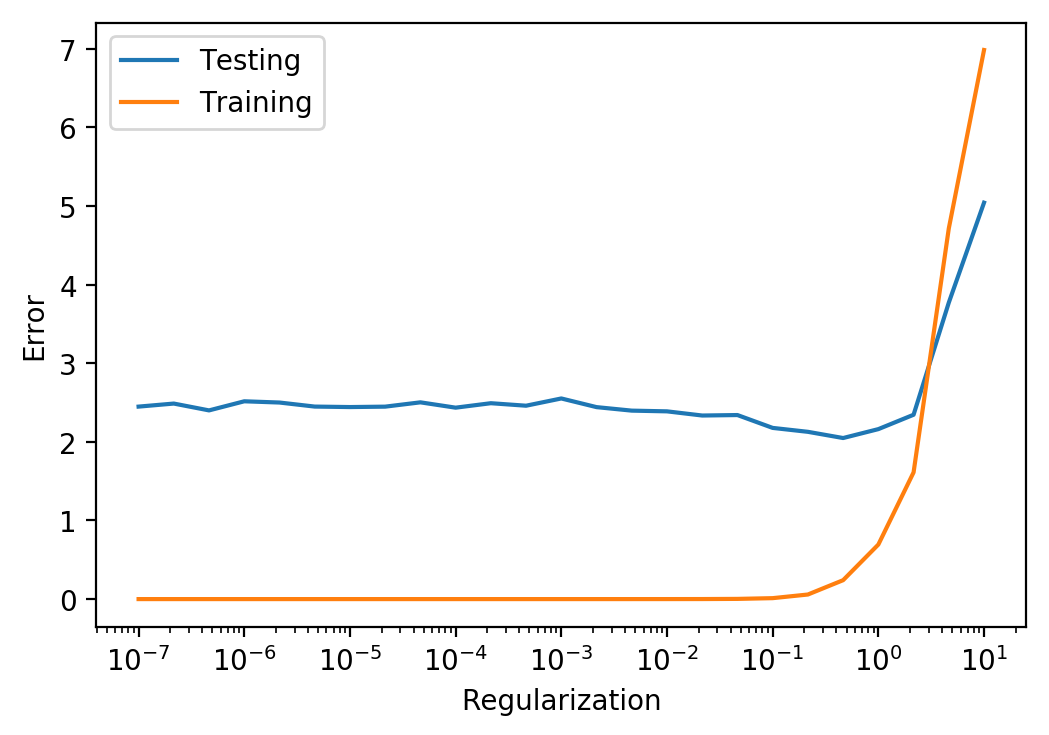

In [44]:
# plt.subplots(1, 1, figsize=)
plt.plot(regs, [a[1] for a in losses], label='Testing')
plt.plot(regs, [a[0] for a in losses], label='Training')
plt.xscale('log')
plt.ylabel('Error')
plt.xlabel('Regularization')
plt.legend()
# plt.yscale('log')
plt.show()

In [39]:
U, V, loss = train_model(M, N, K, 0.03, regs[-5], trainData[:, 0:3], eps=1e-10, max_epochs=300)
print('testing error is: {0:.2f}'.format(get_err(U, V, testData[:, 0:3])))

early stop at 11
testing error is: 2.05


In [30]:
get_err(U, V, testData[:, 0:3])

2.0726646055384252